# Analysis of Cryptocurrency Prices and Solar Activity

This notebook aims to investigate the potential relationship between cryptocurrency price fluctuations (Bitcoin and Ethereum) and solar activity (daily sunspot observations). We will collect and clean the data, perform exploratory data analysis (EDA), and conduct hypothesis tests to see if there's any statistically significant relationship between sunspot activity and crypto market returns.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Enable inline plotting
%matplotlib inline

print('Libraries imported successfully!')

Libraries imported successfully!


In [ ]:
# Load the datasets

# Load Bitcoin price data (assuming the CSV file has a 'Date' column and price columns such as 'Open', 'High', 'Low', 'Close')
bitcoin_df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])
print("Bitcoin Data:")
print(bitcoin_df.head())

# Load Ethereum price data (similarly assuming the presence of 'Date' and price columns)
ethereum_df = pd.read_csv('ethereum_data.csv', parse_dates=['Date'])
print("\nEthereum Data:")
print(ethereum_df.head())

# Load Daily Sunspot Data (assuming it contains 'Date' and 'Sunspots' columns)
sunspots_df = pd.read_csv('daily_sunspots.csv', parse_dates=['Date'])
print("\nSunspot Data:")
print(sunspots_df.head())

Bitcoin Data:
        Date         Open         High          Low        Close    Adj Close  \
0 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020  3843.520020   
1 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424  3943.409424   
2 2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  3836.741211   
3 2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  3857.717529   
4 2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  3845.194580   

       Volume  
0  4324200990  
1  5244856836  
2  4530215219  
3  4847965467  
4  5137609824  

Ethereum Data:
        Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-

## Data Cleaning and Preprocessing

In this step, we will check the data for missing values, ensure that date columns are in the proper datetime format, and merge the three datasets based on the `Date` column. This will allow us to analyze the data collectively.

In [5]:
# Merge the cryptocurrency datasets on 'Date'
merged_df = pd.merge(bitcoin_df, ethereum_df, on='Date', suffixes=('_btc', '_eth'), how='inner')

# Merge the resulting DataFrame with the sunspot data
sunspots_df.rename(columns={'date': 'Date'}, inplace=True)
merged_df = pd.merge(merged_df, sunspots_df, on='Date', how='inner')

# Display the first few rows of the merged dataframe
print("Merged DataFrame:")
print(merged_df.head())

# Check for missing values in the merged dataframe
print("\nMissing values in merged DataFrame:")
print(merged_df.isnull().sum())

Merged DataFrame:
        Date     Open_btc     High_btc      Low_btc    Close_btc  \
0 2019-01-01  3746.713379  3850.913818  3707.231201  3843.520020   
1 2019-01-02  3849.216309  3947.981201  3817.409424  3943.409424   
2 2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211   
3 2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529   
4 2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580   

   Adj Close_btc  Volume_btc    Open_eth    High_eth     Low_eth  ...  \
0    3843.520020  4324200990  133.418152  141.397507  132.650711  ...   
1    3943.409424  5244856836  141.519516  156.929138  140.650955  ...   
2    3836.741211  4530215219  155.196045  155.863052  147.198364  ...   
3    3857.717529  4847965467  148.912888  156.878983  147.907104  ...   
4    3845.194580  5137609824  154.337418  160.824890  154.337418  ...   

   Adj Close_eth  Volume_eth  year  month  day  date_frac  counts  std  nobs  \
0     140.819412  2258709868  2019      1    1   2019.

## Exploratory Data Analysis (EDA)

Now, we will explore the data through summary statistics and visualizations. We will start by examining the statistical properties of the merged dataset and then create time series plots for Bitcoin, Ethereum, and sunspot activity.

Statistical Summary:


,Date,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth,year,month,day,date_frac,counts,std,nobs
count,1180,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,2020-08-12 12:00:00,23291.855345,23902.720763,22624.471327,23322.627795,23322.627795,3.191163e+10,1215.852271,1256.871649,1170.207727,1218.094670,1218.094670,1.607014e+10,2020.142373,6.194915,15.652542,2020.614971,17.393220,3.661017,39.033898
min,2019-01-01 00:00:00,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09,104.645050,106.058876,95.184303,104.535301,104.535301,2.212109e+09,2019.000000,1.000000,1.000000,2019.001000,0.000000,0.000000,4.000000
25%,2019-10-22 18:00:00,8401.869141,8627.179688,8258.300537,8435.704834,8435.704834,1.902092e+10,182.657829,187.645809,179.799904,183.176971,183.176971,8.071601e+09,2019.000000,3.000000,8.000000,2019.809250,0.000000,0.000000,32.000000
50%,2020-08-12 12:00:00,11077.506348,11417.957031,10865.553223,11097.407227,11097.407227,2.845324e+10,351.271103,357.992310,337.429169,351.646637,351.646637,1.355902e+10,2020.000000,6.000000,16.000000,2020.614500,9.000000,1.200000,40.000000
75%,2021-06-03 06:00:00,40885.610352,42229.568359,39616.505859,40972.169922,40972.169922,3.998889e+10,2348.527344,2451.559509,2189.335266,2356.223145,2356.223145,2.066368e+10,2021.000000,9.000000,23.000000,2021.421500,24.250000,6.600000,47.000000
max,2022-03-25 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10,2022.000000,12.000000,31.000000,2022.229000,150.000000,28.200000,69.000000
std,NaN,19107.418502,19620.233765,18506.498484,19102.855584,19102.855584,2.001751e+10,1373.164452,1417.040735,1322.328983,1373.261927,1373.261927,1.094956e+10,0.940143,3.535734,8.772477,0.932504,24.846869,4.736924,10.412552


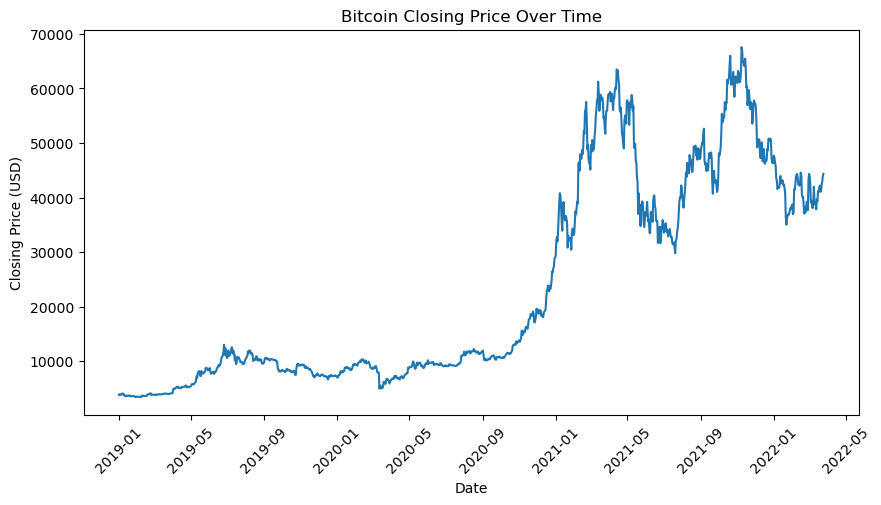

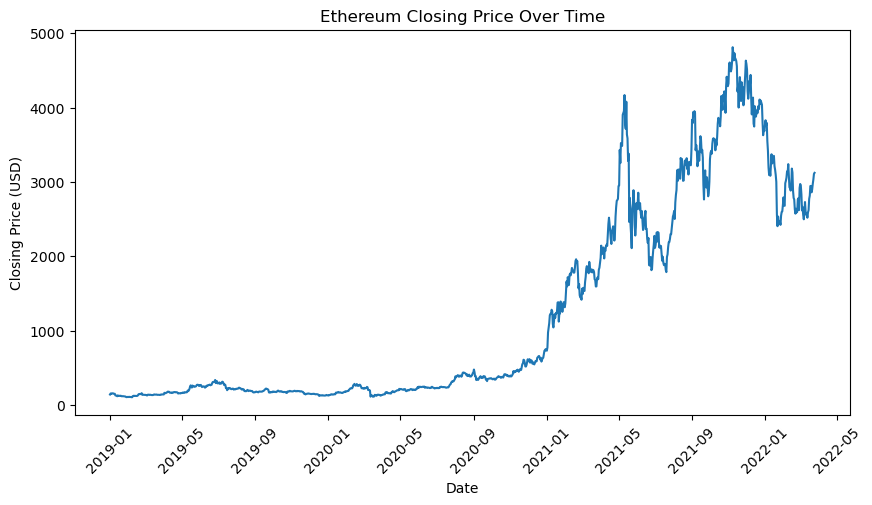

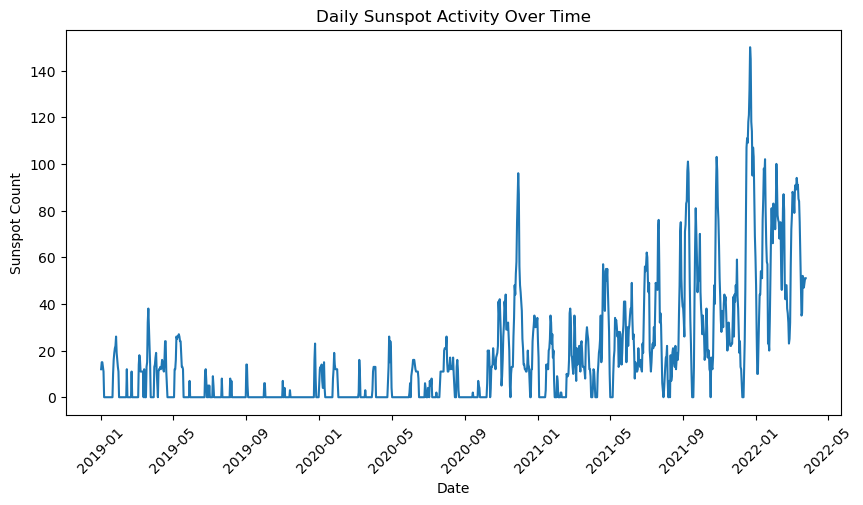

In [7]:
# Display basic statistical summaries
print("Statistical Summary:")
display(merged_df.describe())

# Plot Bitcoin Closing Price over time
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Date'], merged_df['Close_btc'])
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Plot Ethereum Closing Price over time
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Date'], merged_df['Close_eth'])
plt.title('Ethereum Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Plot Sunspot Activity over time
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Date'], merged_df['counts'])
plt.title('Daily Sunspot Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.xticks(rotation=45)
plt.show()

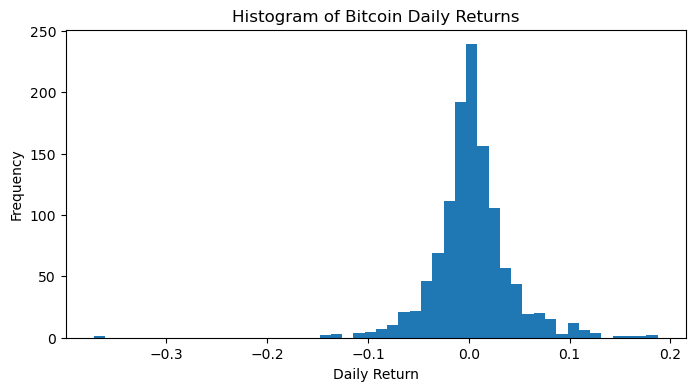

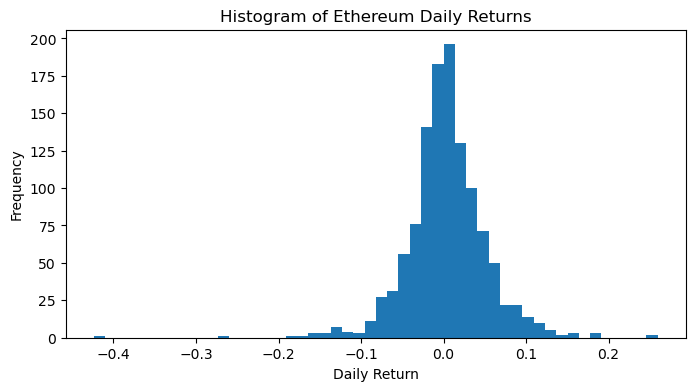

In [8]:
# Calculate daily returns for Bitcoin and Ethereum
merged_df['btc_return'] = merged_df['Close_btc'].pct_change()
merged_df['eth_return'] = merged_df['Close_eth'].pct_change()

# Drop the first row that contains NaN values due to the percentage change calculation
merged_df = merged_df.dropna(subset=['btc_return', 'eth_return'])

# Plot histogram of Bitcoin daily returns
plt.figure(figsize=(8, 4))
plt.hist(merged_df['btc_return'], bins=50)
plt.title('Histogram of Bitcoin Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of Ethereum daily returns
plt.figure(figsize=(8, 4))
plt.hist(merged_df['eth_return'], bins=50)
plt.title('Histogram of Ethereum Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

## Hypothesis Testing

We will now test the hypothesis that there is no significant relationship between sunspot activity and cryptocurrency daily returns. 

### Pearson Correlation Tests

First, we will use Pearson’s correlation test to examine the linear relationship between sunspot counts and the daily returns of Bitcoin and Ethereum.

### t-tests

Additionally, we will conduct t-tests to compare the mean daily returns on days with high sunspot activity versus days with low sunspot activity (using the median sunspot count as a cutoff).

In [12]:
# Ensure no missing values exist in our columns of interest
merged_df = merged_df.dropna(subset=['counts', 'btc_return', 'eth_return'])

# Pearson correlation for Bitcoin returns and Sunspots
btc_corr, btc_pvalue = stats.pearsonr(merged_df['btc_return'], merged_df['counts'])
print("Bitcoin Daily Returns and Sunspot Activity:")
print(f"Pearson Correlation: {btc_corr:.4f}, p-value: {btc_pvalue:.4f}")

# Pearson correlation for Ethereum returns and Sunspots
eth_corr, eth_pvalue = stats.pearsonr(merged_df['eth_return'], merged_df['counts'])
print("\nEthereum Daily Returns and Sunspot Activity:")
print(f"Pearson Correlation: {eth_corr:.4f}, p-value: {eth_pvalue:.4f}")

Bitcoin Daily Returns and Sunspot Activity:
Pearson Correlation: -0.0031, p-value: 0.9161

Ethereum Daily Returns and Sunspot Activity:
Pearson Correlation: 0.0118, p-value: 0.6856


In [14]:
# Define high and low sunspot groups using the median as the threshold
median_sunspots = merged_df['counts'].median()
high_sunspots = merged_df[merged_df['counts'] > median_sunspots]
low_sunspots = merged_df[merged_df['counts'] <= median_sunspots]

# t-test for Bitcoin daily returns between high and low sunspot days
t_stat_btc, p_value_btc = stats.ttest_ind(high_sunspots['btc_return'], low_sunspots['btc_return'], equal_var=False)
print("T-test for Bitcoin Daily Returns (High vs. Low Sunspot Activity):")
print(f"t-statistic: {t_stat_btc:.4f}, p-value: {p_value_btc:.4f}")

# t-test for Ethereum daily returns between high and low sunspot days
t_stat_eth, p_value_eth = stats.ttest_ind(high_sunspots['eth_return'], low_sunspots['eth_return'], equal_var=False)
print("\nT-test for Ethereum Daily Returns (High vs. Low Sunspot Activity):")
print(f"t-statistic: {t_stat_eth:.4f}, p-value: {p_value_eth:.4f}")

T-test for Bitcoin Daily Returns (High vs. Low Sunspot Activity):
t-statistic: 0.2927, p-value: 0.7698

T-test for Ethereum Daily Returns (High vs. Low Sunspot Activity):
t-statistic: 0.5664, p-value: 0.5713
